# Machine Learning 

Zhentao Shi

<img src="graph/Ada_Lovelace.jpg" width="800">

## Introduction

Machine learning and artificial intelligence:

* Technology or alchemy?
* Statistics or biology?
* [Tom Sargent, (2019)](https://www.project-syndicate.org/commentary/artificial-intelligence-new-economic-models-by-thomas-j-sargent-2019-11)
* Large language models
* Generative models
* The AI revolution


## Supervised Learning

* Connection between $X$ and $Y$
* Regression and classification

A set of data fitting procedures focusing on out-of-sample prediction
* Repeat a scientific experiment for $n$ times and obtain a dataset $(y_i, x_i)_{i=1}^n$.
* How to best predict $y_{n+1}$ given $x_{n+1}$?

# Unsupervised Learning

* Only about $X$
* Density estimation, principal component analysis, and clustering


# Conventional Statistics

* Consistency
* Asymptotic distribution (hopefully normal)
* Efficiency

# Machine Learning's Responses

* Efficiency is mostly irrelevant given big data
* Statistical inference may not be the goal
    * Recommendation system on Amazon or Taobao
    * Care about the prediction accuracy, not the causal link
* Is there a data generating process (DGP)?

## Toy Examples

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import fetch_california_housing


# Load California Housing Dataset
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df['MedHouseVal'] = california.target
print(df.head())

C:\Users\zhent\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [2]:
# display the summary statistics of the dataset df

print(df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [3]:

# Define the problem
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# Make regression model 
model = sm.OLS(y, X1)

# Fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     3970.
Date:                Thu, 27 Mar 2025   Prob (F-statistic):               0.00
Time:                        16:56:43   Log-Likelihood:                -22624.
No. Observations:               20640   AIC:                         4.527e+04
Df Residuals:                   20631   BIC:                         4.534e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9419      0.659    -56.067      0.0

In [ ]:
X['Population'] = np.log(X['Population']) # log transformation of the population

In [5]:
import random

nobs = df.shape[0]
# randomly draw a number from each column of X

new_house = (X1.iloc[0]).copy() # randomly generate features of a new house

for i in range(1, X1.shape[1]):
    new_house[i] = X1.iloc[ random.randint(0, nobs),  i].copy()

print(new_house)

const           1.000000
MedInc          7.387800
HouseAge        4.000000
AveRooms        5.521040
AveBedrms       1.001397
Population    932.000000
AveOccup        2.539708
Latitude       38.580000
Longitude    -122.320000
Name: 0, dtype: float64


C:\Users\zhent\AppData\Local\Temp\ipykernel_66012\99423061.py:9: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  new_house[i] = X1.iloc[ random.randint(0, nobs),  i].copy()


In [6]:
# use new house to predict the price
results.predict(exog = new_house)

None    3.257554
dtype: float64

### Unsupervised

MLE

In [7]:
from scipy.stats import pareto
from scipy.optimize import minimize

# Simulate a random dataset from a Pareto distribution
n = 100
alpha_true = 2
data = pareto.rvs(alpha_true, size=n)
# data = np.random.uniform(1.1, n) # a misspecified distribution

# Define the log-likelihood function for Pareto distribution
def pareto_log_likelihood(params, data):
    alpha = params
    log_likelihood = np.sum(np.log(alpha) - (1+alpha)*np.log(data) )
    return -log_likelihood

# Find the MLE estimate
initial_guess = [1]
result = minimize(pareto_log_likelihood, initial_guess, args=(data,))
mle_alpha = result.x[0]

# Print the MLE estimate
print("Estimated alpha:", mle_alpha)


Estimated alpha: 2.0969289210837068


# First Generation

## Nonparametric Estimation

* *Parametric*: a finite number of parameters
* *Nonparametric*: an infinite number of parameters

* Some ideas in nonparametric estimation is directly related to machine learning

# Example: Density Estimation

* Density estimation given a sample $(x_1,\ldots,x_n)$
* If drawn from a parametric family, MLE for estimation
* Misspecification 

* Histogram is nonparametric
    * If grid too fine, small bias but large variance
    * If grid too coarse, small variance but large bias
    

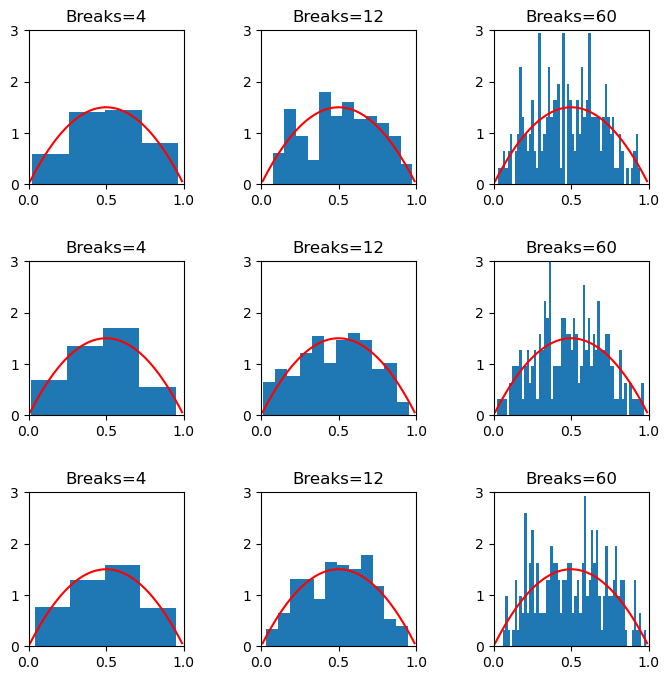

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

n = 200
x_base = np.arange(0.01, 1, 0.01)
breaks_list = [4, 12, 60]

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(8, 8)
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, ax in enumerate(axs.flat):
    ii = i // 3
    bb = breaks_list[i % 3]
    x = np.random.beta(2, 2, size=n)
    ax.hist(x, bins=bb, density=True)
    ax.plot(x_base, beta.pdf(x_base, 2, 2), color="red")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 3)
    ax.set_title(f"Breaks={bb}")

plt.show()

## Variance-Bias Tradeoff

![](graph/bias_variance.png)

### Example: Conditional Mean

* Conditional mean $$f(x) = E[y_i |x_i = x]$$ given a sample $(y_i, x_i)$. 
* Solve 
$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$
* In general $f(x)$ is a nonlinear function.

# Series Estimation

* Series expansion to approximate $f(x)$
* Generates many additive regressors
    * Ex: bounded, continuous and differentiate function has a series
representation $f(x) = \sum_{k=0}^{\infty} \beta_k \cos (\frac{k}{2}\pi x )$.
    * In finite sample, choose a finite $K$, usually much smaller than $n$
    * Asymptotically $K \to \infty$ as $n \to \infty$ so that
$$
f_K(x) = \sum_{k=0}^{K} \beta_k \cos \left(\frac{k}{2}\pi x \right) \to f(x).
$$

* Bias-variance trade-off
    * Big $K$: small bias and large variance 
    * Small $K$: small variance and large bias

# Penalization

* Specify a sufficiently large $K$, and then add a penalty term to control the complexity
* Eg: *Ridge regression*: 
$$
\min_\beta \  \frac{1}{2n}  \sum_{i=1}^n \left(y_i - \sum_{k=0}^{K} \beta_k f_k(x_i) \right)^2
+ \lambda \sum_{k=0}^K \beta_k^2,
$$
where $\lambda$ is the tuning parameter such that $\lambda \to 0$ as $n\to \infty$, and
$f_k(x_i) = \cos \left(\frac{k}{2}\pi x_i \right)$. 

In compact notation, let $Y=(y_1,\ldots,y_n)'$ and
$X = (X_{ik} = f_k(x_i) )$, the above problem can be written as
$$
\frac{1}{n} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_2 ^2
$$

# Tuning Parameter

* *Information criterion*: AIC, BIC
* *Cross validation*


* Active statistical research, but has little economics

# Econometrics Workflow

![](graph/metric_flow.png)

## Data Splitting

![ ](graph/ML_flow.png)

## Data Splitting


* Machine learning's main purpose is often prediction
* Agnostic about the DGP.
* Models are measured by their performance in prediction.
* Tuning.

* Training dataset
* Validation dataset

* Testing sample

### Cross Validation (cross sectional data)

* $S$-fold cross validation partitions the dataset into $S$ disjoint sections
* Each iteration picks one of the sections as the (quasi) validation sample
* The other $S-1$ sections as the training sample.
* Compute an out-of-sample goodness-of-fit measurement

### Goodness of Fit (Out of Sample)

* *Mean-squared prediction error* ${n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2$ where $val$ is the validation set and $n_v$ is its cardinality, 
* *Mean-absolute prediction error* ${n_v}^{-1}\sum_{i \in val} |y_i - \hat{y}_i|$. 
* *Out of sample R-squared* (OOS $R^2$):

$$
1 - \frac{{n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2}{{n_v}^{-1} \sum_{i \in val} y_i^2}
$$

* Repeat this process for $S$ times so that each of the $S$ sections are treated as the validation sample, 
* Average the goodness-of-fit measurement over the $S$ sections to determined the best tuning parameter. 
* In practice we can use  $S=5$ for 10

### Cross Validation (time series data)

* In time series context, cross validation must preserve the dependence structure. 
* If the time series is stationary, we can partition the data into $S$ consecutive blocks. 

(i will skip this slide)

* If the purpose is forecasting, then we can use nested CV. 
![ ](graph/CV_Figure.png)

* Nested CV with fixed-length rolling window scheme
* The sub-training data can also be an extending rolling window.

## Variable Selection

* Number of covariates $x_i$ can be large.

* Conventional attitude: prior knowledge
* Recently economists wake up from the long lasting negligence.
    * Stock and Watson (2012): forecasting 143 US macroeconomic indicators.
    * A horse race of several variable selection methods.

# Lasso

* least-absolute-shrinkage-and-selection-operator
(Lasso) (Tibshirani, 1996)
* Penalizes the $L_1$ norm of the coefficients.
The criterion function of Lasso is written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_1
$$
where $\lambda \geq 0$ is a tuning parameter. 

Lasso shrinks some coefficients exactly to 0, in a wide range of values of $\lambda$


![ ](graph/lasso_regression2.png)

## Demo of OLS, Lasso and Ridge

* [kaggle link](https://www.kaggle.com/code/frankshi0/ols-and-regularization)

# SCAD

* Smoothly-clipped-absolute-deviation (SCAD) Fan and Li (2001):
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \sum_{j=1}^d \rho_{\lambda}( |\beta_j| )
$$
where
$$
\rho_{\lambda}^{\prime} (\theta) = \lambda \left\{ 1\{\theta\leq \lambda \} +
\frac{(a\lambda - \theta)_+}{(a-1)\lambda} \cdot 1 \{\theta > \lambda\} \right\}
$$
for some $a>2$ and $\theta>0$. 

* SCAD enjoys *oracle property*. 


# Adaptive Lasso

*Adaptive Lasso* (Zou, 2006) also enjoys the oracle property.

Two-step algorithm:
1. First run a Lasso or ridge regression and save the estimator $\hat{\beta}^{(1)}$
2. Solve 
$(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \sum_{j=1}^d  w_j |\beta_j|$
where $w_j = 1 /  |\hat{\beta}_j^{(1)} |^a$ and $a\geq 1$ is a constant. (Common choice is $a = 1$ or 2).

* Lee, Shi and Gao (2022)

### There are no packages for adaptive lasso in python like "glmnet" in R

We can only use CVXPY to DIY

In [9]:
import numpy as np
from scipy.linalg import pinv
from sklearn.linear_model import LassoCV, Lasso

# Set up the data
n = 40
p = 50
b0 = np.concatenate([np.ones(10), np.zeros(p - 10)])
x = np.random.normal(size=(n, p))
y = np.dot(x, b0) + np.random.normal(size=n)


In [10]:

# OLS
ols = np.dot(pinv(np.dot(x.T, x)), np.dot(x.T, y))

# Lasso
lasso_cv = LassoCV(cv=5).fit(x, y)
lasso_result = Lasso(alpha=lasso_cv.alpha_).fit(x, y)

lasso_result.coef_


array([ 0.57563743,  0.59643887,  0.50454758,  0.80968108,  0.39334395,
        0.        ,  0.61800726,  0.22021062,  0.6729486 ,  0.22546248,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.07031181, -0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.04511429,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.13942761, -0.        ,  0.02658808])

# Stagewise Forward Selection

More methods are available if prediction of the response variables is the sole purpose of the regression.

Eg: *stagewise forward selection*

1. Start from an empty model. 
2. Given many candidate $x_j$, in each round we add the regressor that can
produce the biggest $R^2$. 

Close to the idea of *$L_2$ componentwise boosting*
which does not adjust the coefficients fitted earlier

* Shi and Huang (2023)

# Second Generation

# Prediction-Oriented Methods

* Methods that induces data-driven interaction of the covariates.
* Interaction makes the covariates much more flexible
* Insufficient theoretical understanding
* "Black-boxes" methods

* Surprisingly superior performance
* Industry insiders are pondering "alchemy"

In [11]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=0.1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


# Regression Tree

* Supervised learning: $x \to y $
* Regression tree (Breiman, 1984) recursively partitions the space of the regressors
    * Each time a covariate is split into two dummies
    * Splitting criterion is aggressive reduction of the SSR
    * Tuning parameter is the depth of the tree
    * Given a dataset $d$ and the depth of the tree, the fitted tree $\hat{r}(d)$ is deterministic

- Example: Using longitude and latitude for Beijing housing price.

# Bagging

* Tree is unstable
* *Bootstrap averaging*, or *bagging*, reduces variance of trees (Breiman, 1996)
    * Grow a tree for each bootstrap sample
    * Simple average

* An example of the *ensemble learning*.

* Inoue and Kilian (2008): an early application of bagging in time series forecast.
* Hirano and Wright (2017): a theoretical perspective on the risk reduction of bagging.

# Random Forest

* *Random forest* (Breiman, 2001):
    * Draw a bootstrap sample
    * Before each split, shakes up the regressors by randomly sampling $m$ out of the total $p$ covarites. Stop until the depth of the tree is reached.
    * Average the trees over the bootstrap samples
    
* The tuning parameters are the tree depth and $m$
* More stable than bagging thanks to "de-correlation"

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

# Load California housing dataset
california = fetch_california_housing()
X, y = california.data, california.target
feature_names = california.feature_names

# training Sample with 300 observations
train_indices = np.random.choice(np.arange(len(y)), size=300, replace=False)

# Fit Random Forest model
rf = RandomForestRegressor(n_estimators=500, random_state=101)
# document: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# "n_estimators" is the number of trees in a forest

rf.fit(X[train_indices], y[train_indices])


RandomForestRegressor(n_estimators=500, random_state=101)

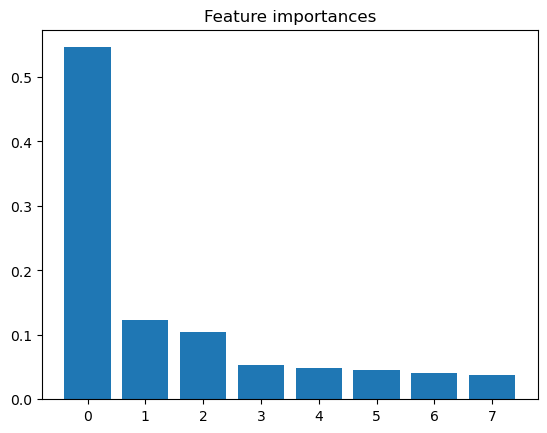

In [13]:

# Plot feature importances
feat_importances = rf.feature_importances_
indices = np.argsort(feat_importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), feat_importances[indices])
plt.show()

* Consistency of random forest is not proved
until Scornet, Biau, and Vert (2015)
* Inferential theory was first established by
Wager Athey (2018)  in the context of treatment effect estimation
* Athey, Tibshirani, and Wager (2019) generalizes CART to local maximum likelihood.

## Gradient Boosting

* Bagging and random forest use equal weight on each generated tree for the ensemble
* Tree boosting takes a deterministic approach for the weights
    1. Use the original data $d^0=(x_i,y_i)$ to grow a shallow tree $\hat{r}^{0}(d^0)$. Save the prediction $f^0_i = \alpha \cdot \hat{r}^0 (d^0, x_i)$ where
   $\alpha\in [0,1]$ is a shrinkage tuning parameter. Save
   the residual $e_i^{0} = y_i - f^0_i$. Set $m=1$.
    2. In the $m$-th iteration, use the data $d^m = (x_i,e_i^{m-1})$ to grow a shallow tree $\hat{r}^{m}(d^m)$. Save the prediction $f^m_i =  f^{m-1}_i +  \alpha \cdot \hat{r}^m (d, x_i)$. Save
   the residual $e_i^{m} = y_i - f^m_i$. Update $m = m+1$.
    3. Repeat Step 2 until $m > M$.

* Boosting has three tuning parameters: the tree depth,  the shrinkage level $\alpha$, and the number of iterations $M$
* The algorithm can be sensitive to any of the three tuning parameters
* When a model is tuned well, it can performs remarkably
    * Example: Beijing housing data.
    * Gradient boosting via the package `gbm`

## Real Data Example

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error


In [15]:
# Load the data
lianjia = pd.read_csv("data_example/lianjia.csv",encoding='gbk')

# Sampling with a seed for reproducibility
lianjia = lianjia.sample(frac=0.05, random_state=1)

train_data, test_data = train_test_split(lianjia, test_size=0.7, random_state=1)

train_ind = train_data.index

# Define the hyperparameters
param_grid = {
    'max_depth': [10, 20, 40],  # equivalent to interaction.depth in R's gbm
    'n_estimators': [1000, 5000, 9000],  # equivalent to n.trees
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1],  # equivalent to shrinkage
    'min_samples_leaf': [10, 15, 20],  # equivalent to n.minobsinnode
}

# Create a Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5)

C:\Users\zhent\AppData\Local\Temp\ipykernel_66012\3962116467.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  lianjia = pd.read_csv("data_example/lianjia.csv",encoding='gbk')


In [16]:
predictors = ["square", "livingRoom", "drawingRoom", "kitchen", "bathRoom",
              "floor_total", "elevator", "ladderRatio",
              "age", "DOM", "followers", "fiveYearsProperty",
              "subway", "district", "Lng", "Lat", "t_trade",
              "communityAverage"]

# Your target variable
target = 'price'

# Prepare your predictor and target datasets
X = lianjia[predictors]
y = lianjia[target]

In [17]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Create the Gradient Boosting Regressor
gbm = GradientBoostingRegressor(loss='squared_error', random_state=0)

# Start the timer
start_time = time.time()

# Perform grid search
grid_search = GridSearchCV(estimator = gbm, 
                           param_grid = param_grid, 
                           scoring = 'neg_mean_squared_error', 
                           cv=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

grid_search.fit(X_train, y_train)

# Calculate the time taken
end_time = time.time()
duration = end_time - start_time

# Print the best parameters and the corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)
print("Time taken:", duration, "seconds")



KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Set the best parameters to the new model
gbm.set_params(**best_params)

# Now when you call fit on gbm, it will use the best parameters
gbm.fit(X_train, y_train)

# Predict with GBM model
pred_boosting = gbm.predict(X_test)

# Fit the linear regression model
lmReg = LinearRegression()
lmReg.fit(X_train, y_train)

# Predict with linear regression model
pred_lm = lmReg.predict(X_test)

# Comparison
r_squared_gbm = r2_score(y_test, pred_boosting)
r_squared_lm = r2_score(y_test, pred_lm)

print("R-squared of GBM prediction =", r_squared_gbm)
print("R-squared of LM prediction =", r_squared_lm)

* Many variants of boosting algorithms
    * $L_2$-boosting
    * componentwise boosting
    * AdaBoosting, etc

# Summary

* Mature algorithms for implementation
* Theoretical investigation is in progress
* Economic applications are emerging